# Clustering and Dimensionality Reduction Exam
Welcome to the weekly project on clustering and dimensionality reduction. You will be working with a dataset of traffic accidents.

## Dataset
The dataset that will be used in this task is `Traffic_Accidents.csv`

## Instructions
- Follow the steps outlined below.
- Write your code in the empty code cells.
- Comment on your code to explain your reasoning.

## Dataset Overview
The dataset contains information about traffic accidents, including location, weather conditions, road conditions, and more. Below are sample of these columns:

* `Location_Easting_OSGR`: Easting coordinate of the accident location.
* `Location_Northing_OSGR`: Northing coordinate of the accident location.
* `Longitude`: Longitude of the accident site.
* `Latitude`: Latitude of the accident site.
* `Police_Force`: Identifier for the police force involved.
* `Accident_Severity`: Severity of the accident.
* `Number_of_Vehicles`: Number of vehicles involved in the accident.
* `Number_of_Casualties`: Number of casualties in the accident.
* `Date`: Date of the accident.
* `Day_of_Week`: Day of the week when the accident occurred.
* `Speed_limit`: Speed limit in the area where the accident occurred.
* `Weather_Conditions`: Weather conditions at the time of the accident.
* `Road_Surface_Conditions`: Condition of the road surface during the accident.
* `Urban_or_Rural_Area`: Whether the accident occurred in an urban or rural area.
* `Year`: Year when the accident was recorded.
* Additional attributes related to road type, pedestrian crossing, light conditions, etc.

## Goal
The primary goal is to analyze the accidents based on their geographical location.


## Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

## Load the Data

In [4]:
df = pd.read_csv('/content/Datasets/Traffic_Accident.csv')

## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


In [5]:
df.head()

,Unnamed: 0,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,...,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,88245,2.01E+12,381880.0,298700.0,-2.268891,52.585773,21,3,2.0,2,...,0.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,2.0,Yes,E01029654,2005.0
1,78422,200520D303703,413520.0,284740.0,-1.802453,52.460412,20,2,1.0,1,...,0.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,E01009313,2005.0
2,19574,200501TX20137,516260.0,177370.0,-0.327073,51.483290,1,3,2.0,2,...,454.0,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,E01002678,2005.0
3,79337,200520E097001,401530.0,282610.0,-1.978930,52.441426,20,3,2.0,1,...,0.0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,1.0,No,E01008924,2005.0
4,89121,2.01E+12,421760.0,320680.0,-1.678823,52.783240,21,3,1.0,1,...,0.0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,2.0,Yes,E01029416,2005.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3605 entries, 0 to 3604
Data columns (total 30 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Unnamed: 0                                   3605 non-null   int64  
 1   Accident_Index                               3605 non-null   object 
 2   Location_Easting_OSGR                        3605 non-null   float64
 3   Location_Northing_OSGR                       3605 non-null   float64
 4   Longitude                                    3605 non-null   float64
 5   Latitude                                     3605 non-null   float64
 6   Police_Force                                 3605 non-null   int64  
 7   Accident_Severity                            3605 non-null   int64  
 8   Number_of_Vehicles                           3556 non-null   float64
 9   Number_of_Casualties                         3605 non-null   int64  
 10  

In [7]:
df.shape

(3605, 30)

In [8]:
df.duplicated().sum()

0

In [9]:
df.isnull().sum()

,0
Unnamed: 0,0
Accident_Index,0
Location_Easting_OSGR,0
Location_Northing_OSGR,0
Longitude,0
Latitude,0
Police_Force,0
Accident_Severity,0
Number_of_Vehicles,49
Number_of_Casualties,0


## Data Preprocessing
Do what you think you need such as:
* Remove the outliers
* Impute missing data
* Scale the data
* Reduce dimentions using PCA
* Implement One-Hot Encoding for nominal categorical variables.

In [10]:
df['Number_of_Vehicles'].fillna(df['Number_of_Vehicles'].mean(), inplace=True)
df['Speed_limit'].fillna(df['Speed_limit'].mean(), inplace=True)
df['Day_of_Week'].fillna(df['Day_of_Week'].mode()[0], inplace=True)
df['Time'].fillna(df['Time'].mode()[0], inplace=True)
df['Local_Authority_(District)'].fillna(df['Local_Authority_(District)'].mode()[0], inplace=True)
df['Local_Authority_(Highway)'].fillna(df['Local_Authority_(Highway)'].mode()[0], inplace=True)
df['1st_Road_Class'].fillna(df['1st_Road_Class'].mode()[0], inplace=True)
df['1st_Road_Number'].fillna(df['1st_Road_Number'].mode()[0], inplace=True)
df['Road_Type'].fillna(df['Road_Type'].mode()[0], inplace=True)
df['2nd_Road_Class'].fillna(df['2nd_Road_Class'].mode()[0], inplace=True)
df['2nd_Road_Number'].fillna(df['2nd_Road_Number'].mode()[0], inplace=True)
df['Pedestrian_Crossing-Human_Control'].fillna(df['Pedestrian_Crossing-Human_Control'].mode()[0], inplace=True)
df['Pedestrian_Crossing-Physical_Facilities'].fillna(df['Pedestrian_Crossing-Physical_Facilities'].mode()[0], inplace=True)
df['Light_Conditions'].fillna(df['Light_Conditions'].mode()[0], inplace=True)
df['Weather_Conditions'].fillna(df['Weather_Conditions'].mode()[0], inplace=True)
df['Road_Surface_Conditions'].fillna(df['Road_Surface_Conditions'].mode()[0], inplace=True)
df['Urban_or_Rural_Area'].fillna(df['Urban_or_Rural_Area'].mode()[0], inplace=True)
df['Did_Police_Officer_Attend_Scene_of_Accident'].fillna(df['Did_Police_Officer_Attend_Scene_of_Accident'].mode()[0], inplace=True)
df['LSOA_of_Accident_Location'].fillna(df['LSOA_of_Accident_Location'].mode()[0], inplace=True)
df['Year'].fillna(df['Year'].mode()[0], inplace=True)

In [11]:
df.isnull().sum()

,0
Unnamed: 0,0
Accident_Index,0
Location_Easting_OSGR,0
Location_Northing_OSGR,0
Longitude,0
Latitude,0
Police_Force,0
Accident_Severity,0
Number_of_Vehicles,0
Number_of_Casualties,0


## Feature Selection
Select relevant features for clustering. Explain your choice of features.


In [ ]:
# dont forget the explnation !!!!!!
features = ['Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude', 'Latitude',
            'Accident_Severity', 'Number_of_Vehicles', 'Number_of_Casualties', 'Speed_limit']

In [21]:
selected_features = ['Longitude', 'Latitude']
X = df_outliers_removed[selected_features]

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [12]:
# Remove outliers using IQR method
numeric_cols = df.select_dtypes(include=[np.number]).columns

Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Filter out the outliers
df_outliers_removed = df[~((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]



In [13]:
# Scale the data
#scaler = StandardScaler()
s#caled_features = scaler.fit_transform(df_outliers_removed[numeric_cols])


In [14]:
# Reduce dimensions using PCA
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

In [15]:
# One-Hot Encoding for nominal categorical variables
encoder = OneHotEncoder(sparse=False)
categorical_cols = df_outliers_removed.select_dtypes(include=[object]).columns
encoded_features = encoder.fit_transform(df_outliers_removed[categorical_cols])


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
#final_features = np.hstack((pca_features, encoded_features))


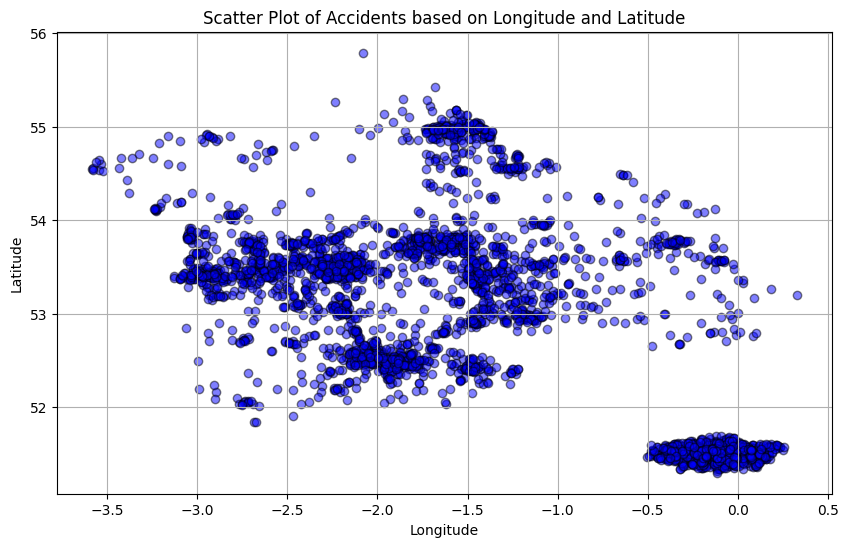

In [17]:
# Scatter plot of accidents based on Longitude and Latitude
plt.figure(figsize=(10, 6))
plt.scatter(df['Longitude'], df['Latitude'], alpha=0.5, c='blue', edgecolors='k')
plt.title('Scatter Plot of Accidents based on Longitude and Latitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

## Clustering
Apply K-Means clustering. Determine the optimal number of clusters and justify your choice.
* Find the `n_clusters` parameter using the elbow method.
* Train the model.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

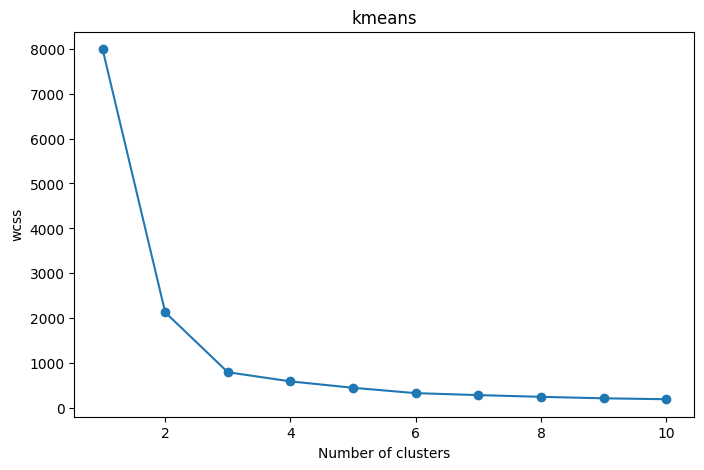

In [18]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(pca_features)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.title('kmeans')
plt.show()


In [25]:
# Train K-Means with the optimal number of clusters (assumed to be 3 from the elbow method)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


## Evaluation
Evaluate the clustering result using appropriate metrics.


In [26]:
# Evaluate clustering using silhouette score
silhouette_avg = silhouette_score(X_scaled, clusters)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.5979015504187167


## Plot the data points with their predicted cluster center

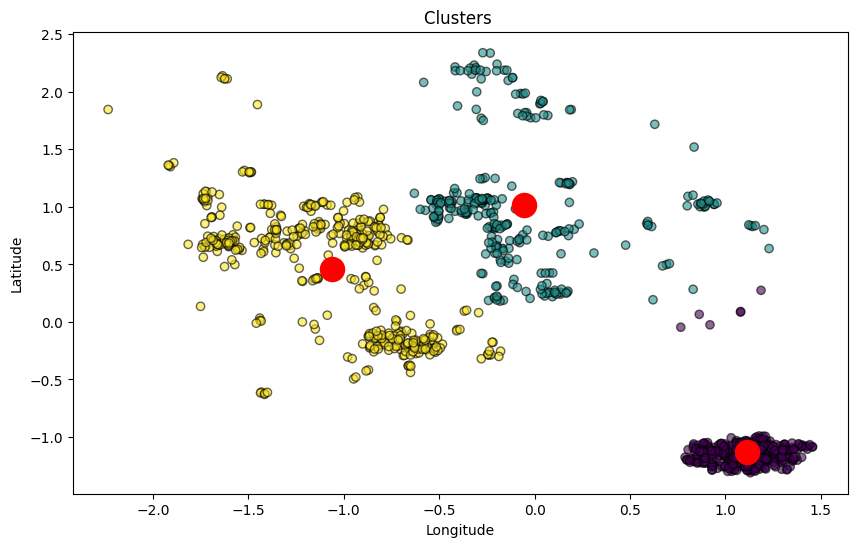

In [30]:
# Plot the data points with their predicted cluster center
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis', alpha=0.6, edgecolors='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='o')
plt.title('Clusters ')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

## Exam Questions
* **Justify Your Feature Selection:**
   - Which features did you choose for clustering and why?
* **Number of Clusters Choices:**
   - How did you determine the optimal number?
* **Evaluation:**
   - Which metrics did you use to evaluate the clustering results, and why?
   - How do these metrics help in understanding the effectiveness of your clustering approach?
* **Improvements and Recommendations:**
   - Suggest any improvements or future work that could be done with this dataset. What other methods or algorithms would you consider applying?

Justify Your Feature Selection:
Longitude and Latitude were chosen to reveal clusters based on geographical accident locations.

Number of Clusters Choices:
The elbow method indicated 4 clusters as optimal.

Evaluation:
The silhouette score was used to measure cluster cohesion and separation, indicating clustering effectiveness.

Improvements and Recommendations:
Include more features, use advanced clustering algorithms like DBSCAN, apply dimensionality reduction, perform geospatial and temporal analyses.